In [1]:
from datetime import datetime, timedelta, timezone
import pandas as pd
from robo_trader import Trader
from robo_trader.strategies import WtCciStAdxStrategy, WtCciStAdxSettings
from robo_trader.feeds import YFinanceFeed
import json
import matplotlib.pyplot as plt

In [2]:
# SYMBOL = "BTC-GBP"
# train_since = datetime(2016, 7, 1, tzinfo=timezone.utc)
# start_date = datetime(2018, 7, 1, tzinfo=timezone.utc)
# end_date = datetime(2019, 7, 1, tzinfo=timezone.utc)
# interval = Interval.ONE_DAY
# period = 28

SYMBOL = "BTC-GBP"
train_since = datetime(2024, 3, 11, tzinfo=timezone.utc)
start_date = datetime(2024, 4, 11, tzinfo=timezone.utc)
end_date = datetime(2024, 5, 11, tzinfo=timezone.utc)
period = 24

feed = YFinanceFeed(interval = '1h')

In [11]:
default_settings = WtCciStAdxSettings(
    wavetrend_overbought_threshold=60,
    wavetrend_oversold_threshold=-60,
    cci_overbought_threshold=100,
    cci_oversold_threshold=-100,
    adx_threshold=25,
    supertrend_length=9,
    supertrend_multiplier=3.0,
    cci_window=12,
    adx_window=12,
    position_size=0.25,
    trailing_stop=0.01
)

# Write settings to disk
settings_file_path = "WtCciStAdx_optimal_settings.json"
with open(settings_file_path, "w") as settings_file:
    settings_dict = default_settings.__dict__
    json.dump(settings_dict, settings_file, indent=4)
    
print(f"Optimal settings have been written to {settings_file_path}")

Optimal settings have been written to WtCciStAdx_optimal_settings.json


In [12]:
with open(settings_file_path, "r") as settings_file:
    optimal_settings_data = json.load(settings_file)
    optimal_settings = WtCciStAdxSettings(**optimal_settings_data)

strategy = WtCciStAdxStrategy(default_settings)

# Create a Trader instance with the strategy
trader = Trader(SYMBOL, 1000, feed, strategy)

# Run the backtest
results = trader.backtest(start_date, end_date, period, train_since, transaction_cost=0.004, trailing_stop_penalty_relief=0.9)


Request to open long position on BTC-GBP
    Opening long position for BTC-GBP with for 25.0% of the cash (£250.0) and 2.0% trail
    Creating MARKET BUY order for BTC-GBP at 55767.078125 with quantity 0.004464999931355109, trail 0.02, limit None, stop None
    Executing MARKET BUY order for BTC-GBP at 55767.078125 with quantity 0.004464999931355109, total cost £249.996 and transaction cost £0.996
    Bought 0.004464999931355109 BTC-GBP at 55767.078125
    Creating TRAILING_STOP SELL order for BTC-GBP at 55767.078125 with quantity 0.004464999931355109, trail 0.02, limit None, stop 54651.7365625
    Updated trailing stop to 55286.657890625
    Updated trailing stop to 55452.078828125
    Updated trailing stop to 55603.9596875
    Updated trailing stop to 55616.11015625
    Updated trailing stop to 55720.35765625
    Executing TRAILING_STOP SELL order for BTC-GBP at 55717.371109375 with quantity 0.004464999931355109, total cost £249.77317041136112 and transaction cost £0.9951122327145862

In [13]:
# Set display options
pd.set_option('display.max_rows', None)  # Adjust None to your specific needs
pd.set_option('display.max_columns', None)  # Adjust None as needed
pd.set_option('display.width', 1000)  # Adjust the width to fit your notebook

print('win rate: ', results['win_rate'])

display(results['returns'])

# Display the results
# Filter the history DataFrame to show only rows with True in open_long or close_long columns
filtered_history = results['history'][(results['history']['open_long'] == True) | (results['history']['close_long'] == True)]

# Display the filtered results
display(filtered_history)

display(results['orders'])


win rate:  0.3333333333333333


,start_date,end_date,price_start,price_end,valuation_start,valuation_end,asset_return,portfolio_return
0,2024-04-11 00:00:00+00:00,2024-04-12 00:00:00+00:00,56343.437500,56004.929688,1000.000000,1000.066007,-0.006008,0.000066
1,2024-04-12 00:00:00+00:00,2024-04-13 00:00:00+00:00,56004.929688,53707.167969,1000.066007,997.786946,-0.041028,-0.002279
2,2024-04-13 00:00:00+00:00,2024-04-14 00:00:00+00:00,53707.167969,51107.062500,997.786946,997.786946,-0.048413,0.000000
3,2024-04-14 00:00:00+00:00,2024-04-15 00:00:00+00:00,51107.062500,52612.289062,997.786946,997.786946,0.029452,0.000000
4,2024-04-15 00:00:00+00:00,2024-04-16 00:00:00+00:00,52612.289062,50873.664062,997.786946,997.786946,-0.033046,0.000000
5,2024-04-16 00:00:00+00:00,2024-04-17 00:00:00+00:00,50873.664062,51509.640625,997.786946,997.786946,0.012501,0.000000
6,2024-04-17 00:00:00+00:00,2024-04-18 00:00:00+00:00,51509.640625,49380.281250,997.786946,997.786946,-0.041339,0.000000
7,2024-04-18 00:00:00+00:00,2024-04-19 00:00:00+00:00,49380.281250,50533.406250,997.786946,997.786946,0.023352,0.000000
8,2024-04-19 00:00:00+00:00,2024-04-20 00:00:00+00:00,50533.406250,51407.269531,997.786946,997.786946,0.017293,0.000000
9,2024-04-20 00:00:00+00:00,2024-04-21 00:00:00+00:00,51407.269531,52392.718750,997.786946,997.786946,0.019169,0.000000


,open,high,low,close,volume,Dividends,Stock Splits,open_long,close_long
date,,,,,,,,,
2024-04-11 11:00:00+00:00,56173.507812,56290.300781,55767.078125,55767.078125,208619520,0.0,0.0,True,False
2024-04-12 15:00:00+00:00,55670.722656,55959.656250,55641.746094,55690.492188,554117120,0.0,0.0,False,True
2024-04-21 14:00:00+00:00,52474.457031,52584.140625,52438.398438,52479.121094,74262528,0.0,0.0,True,False
2024-04-24 13:00:00+00:00,53355.222656,53355.222656,52876.992188,53052.027344,363532288,0.0,0.0,False,True
2024-05-05 01:00:00+00:00,50623.664062,50671.519531,50171.601562,50446.105469,0,0.0,0.0,True,False
2024-05-06 12:00:00+00:00,51057.347656,51124.652344,50356.917969,50490.628906,1167097856,0.0,0.0,False,True


{'48cac508-2d8c-4257-9955-b965fc77fda2': Order(symbol='BTC-GBP', order_type='MARKET', order_side='BUY', quantity=0.004464999931355109, trail=0.02, limit=None, stop=None, id='48cac508-2d8c-4257-9955-b965fc77fda2', timestamp=Timestamp('2024-04-11 11:00:00+0000', tz='UTC'), status='FILLED', trades=[Trade(id='ce2eb3df-d060-4abe-ab78-b06d6c67f501', order_id='48cac508-2d8c-4257-9955-b965fc77fda2', symbol='BTC-GBP', order_type='MARKET', order_side='BUY', price=55767.078125, quantity=0.004464999931355109, timestamp=Timestamp('2024-04-11 11:00:00+0000', tz='UTC'), transaction_costs=0.996)]),
 '0f6ab065-34ee-4510-983e-346a714eb046': Order(symbol='BTC-GBP', order_type='TRAILING_STOP', order_side='SELL', quantity=0.004464999931355109, trail=0.02, limit=None, stop=55720.35765625, id='0f6ab065-34ee-4510-983e-346a714eb046', timestamp=Timestamp('2024-04-11 11:00:00+0000', tz='UTC'), status='FILLED', trades=[Trade(id='d98a4a56-8940-46aa-ae21-d72a9e73bea6', order_id='0f6ab065-34ee-4510-983e-346a714eb046

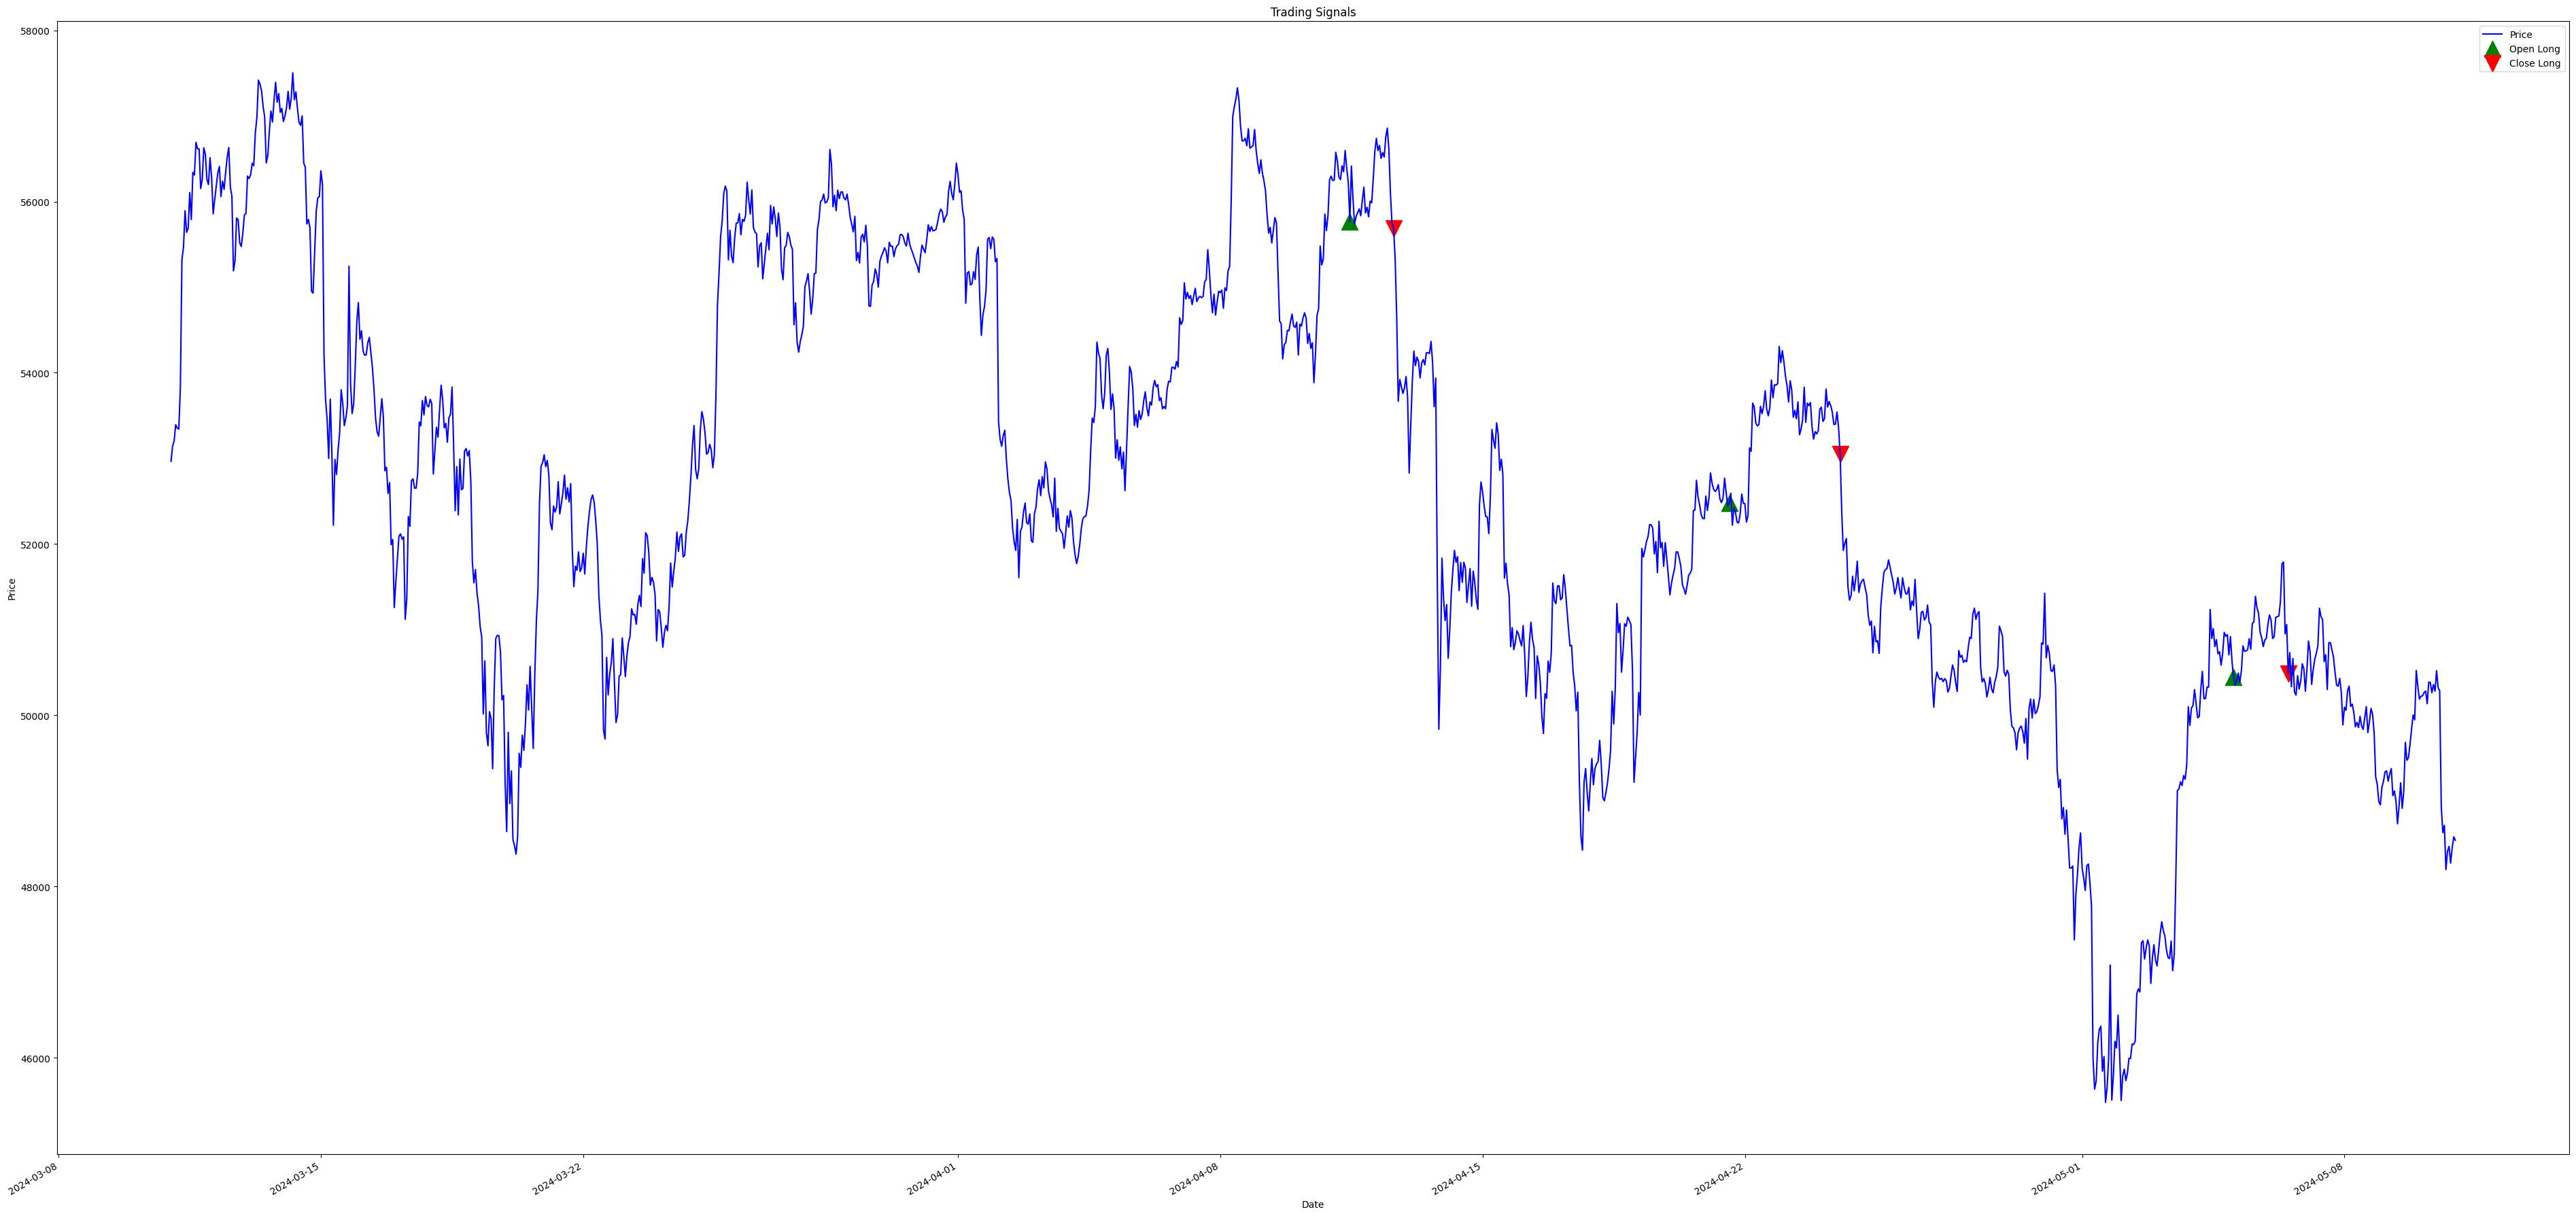

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert the index to datetime if it's not already
results['history'].index = pd.to_datetime(results['history'].index)

# Create the plot
fig, ax = plt.subplots(figsize=(38, 18))

# Plot the price
ax.plot(results['history'].index, results['history']['close'], color='blue', label='Price')

# Plot green arrows for open_long
open_long = results['history'][results['history']['open_long']]
ax.scatter(open_long.index, open_long['close'], color='green', marker='^', s=300, label='Open Long')

# Plot red arrows for close_long
close_long = results['history'][results['history']['close_long']]
ax.scatter(close_long.index, close_long['close'], color='red', marker='v', s=300, label='Close Long')

# Customize the plot
ax.set_title('Trading Signals')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()

# Format x-axis to show dates nicely
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Show the plot
plt.tight_layout()
plt.show()
